In [ ]:
from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import os
from dotenv import load_dotenv

load_dotenv()
file_path = os.getenv('FILE_PATH')

df = pd.read_csv(file_path + "Full_preprocessed_detailed_house.csv", dtype="string")

class InputImages(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe      # A pandas DataFrame with image paths and labels
        self.transform = transform      # Optional transformation pipeline

    def __len__(self):
        return len(self.dataframe)      # total number of samples

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]  # Get row at index `idx`
        image_path = row['frontview_url']
        image_path = file_path + image_path
        image = Image.open(image_path).convert("RGB")  # Open image and ensure it's RGB

        if self.transform:
            image = self.transform(image)  # Apply transformations (e.g., resize, ToTensor, normalize)

        label = row['woningtype']          # Assumes a 'label' column with class info
        return image, label


# waardes hangen af van gebruikte model (CNN, ResNet)
img_preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()              # hierna komt normalisatie, mean+std hangen van gebruikte model af (bijv: transforms.Normalize([0.5, 0.5, 0.5], [0.5,0.5,0.5])
])

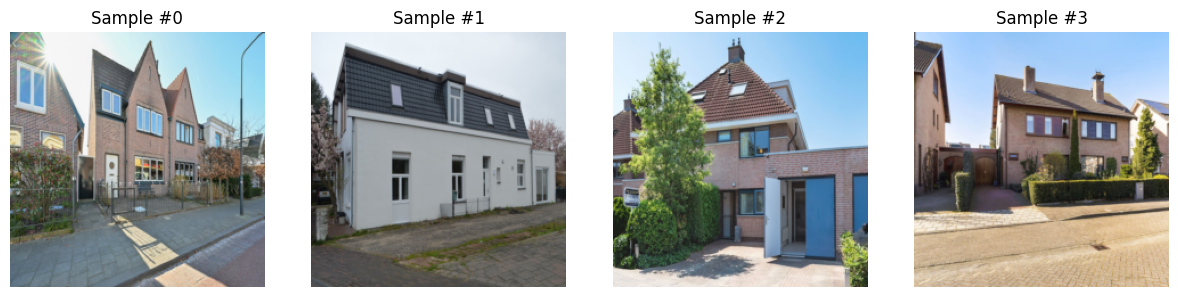

In [15]:
frontview_images = InputImages(df, img_preprocess)

fig = plt.figure(figsize=(12, 4))

for i in range(4):
    sample = frontview_images[i]
    image_tensor, label = sample
    image_np = image_tensor.numpy().transpose((1, 2, 0))


    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    ax.imshow(image_np)

plt.show()

In [16]:
# gebruik voor training en validatie

train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_dataset = InputImages(train_df, transform=img_preprocess)  # train_df veranderen naar hoe de echte train set heet
val_dataset = InputImages(val_df, transform=img_preprocess)      # zeldfde geldt voor val_df

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)